In [1]:
#!pip install google-cloud-bigquery[pandas]
#!pip install seaborn

In [2]:
from google.cloud import bigquery
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [3]:
%%capture
client = bigquery.Client(project='api-project-764811344545')

In [4]:
upw_08_12 = '`oadoi_full.mongo_export_upwNov19_08_12`'
upw_13_18 = '`oadoi_full.mongo_export_upwNov19_13_19`'

In [5]:
client.query(f'SELECT * FROM {upw_13_18} WHERE year=2018 AND genre="journal-article" LIMIT 10').to_dataframe()

,oa_status,year,genre,updated,published_date,journal_is_in_doaj,journal_is_oa,journal_issns,oa_locations,doi,is_oa,publisher,journal_name,data_standard
0,gold,2018,journal-article,2019-11-01 22:51:32.142428+00:00,2018-03-29,True,True,1560-7917,[{'url': 'https://doi.org/10.2807/1560-7917.es...,10.2807/1560-7917.es.2018.23.13.180329-3,True,European Centre for Disease Control and Preven...,Eurosurveillance,2
1,bronze,2018,journal-article,2019-10-31 06:40:37.599979+00:00,2018-01-01,False,False,"0035-2764,1950-6694",[{'url': 'https://www.cairn.info/load_pdf.php?...,10.3917/reco.695.0683,True,CAIRN,Revue économique,2
2,gold,2018,journal-article,2019-10-31 16:20:21.743703+00:00,2018-03-12,True,True,1664-3224,[{'url': 'https://www.frontiersin.org/articles...,10.3389/fimmu.2018.00438,True,Frontiers Media SA,Frontiers in Immunology,2
3,gold,2018,journal-article,2019-11-07 06:20:25.027034+00:00,2018-08-07,True,True,2045-2322,[{'url': 'https://www.nature.com/articles/s415...,10.1038/s41598-018-29997-0,True,"Springer Nature America, Inc",Scientific Reports,2
4,gold,2018,journal-article,2019-11-01 04:59:15.673051+00:00,2018-01-26,True,True,1664-302X,[{'url': 'https://www.frontiersin.org/articles...,10.3389/fmicb.2018.00019,True,Frontiers Media SA,Frontiers in Microbiology,2
5,green,2018,journal-article,2019-11-14 20:18:43.150844+00:00,2018-12-07,False,False,"0305-8719,2041-4927",[{'url': 'https://hal.archives-ouvertes.fr/hal...,10.1144/sp467.15,True,Geological Society of London,"Geological Society, London, Special Publications",2
6,green,2018,journal-article,2019-11-16 23:50:30.876520+00:00,2018-11-29,False,False,"2470-0010,2470-0029",[{'url': 'https://helda.helsinki.fi/bitstream/...,10.1103/physrevd.98.103533,True,American Physical Society (APS),Physical Review D,2
7,gold,2018,journal-article,2019-11-16 20:20:50.499946+00:00,2018-01-23,False,True,2291-0026,[{'url': 'http://www.cmajopen.ca/content/6/1/E...,10.9778/cmajo.20170159,True,Joule Inc.,CMAJ Open,2
8,green,2018,journal-article,2019-10-31 01:01:45.923146+00:00,2018-10-06,False,False,"1387-2877,1875-8908",[{'url': 'http://spiral.imperial.ac.uk/bitstre...,10.3233/jad-180101,True,IOS Press,Journal of Alzheimer's Disease,2
9,gold,2018,journal-article,2019-10-31 10:50:00.933552+00:00,2018-04-10,True,True,1664-462X,[{'url': 'https://www.frontiersin.org/articles...,10.3389/fpls.2018.00470,True,Frontiers Media SA,Frontiers in Plant Science,2


## Open Access availability (is_oa)

In [6]:
oa_08_12 = client.query(f'SELECT year, is_oa, COUNT(DISTINCT(doi)) AS n FROM {upw_08_12} WHERE genre="journal-article" GROUP BY year, is_oa').to_dataframe()
oa_13_18 = client.query(f'SELECT year, is_oa, COUNT(DISTINCT(doi)) AS n FROM {upw_13_18} WHERE year<2019 AND genre="journal-article" GROUP BY year, is_oa').to_dataframe()

In [7]:
df = pd.concat([oa_08_12, oa_13_18])
df.year = pd.to_datetime(df.year.apply(lambda x: str(x) + "-01-01"))
df['prop'] = df.groupby(['year'])['n'].transform(lambda x: x / x.sum())
df = df.sort_values(by=['year']).reset_index(drop=True)
df

,year,is_oa,n,prop
0,2008-01-01,True,646079,0.312379
1,2008-01-01,False,1422175,0.687621
2,2009-01-01,False,1528180,0.676550
3,2009-01-01,True,730604,0.323450
4,2010-01-01,True,823574,0.328862
5,2010-01-01,False,1680740,0.671138
6,2011-01-01,True,928090,0.377915
7,2011-01-01,False,1527730,0.622085
8,2012-01-01,True,1056857,0.401042
9,2012-01-01,False,1578421,0.598958


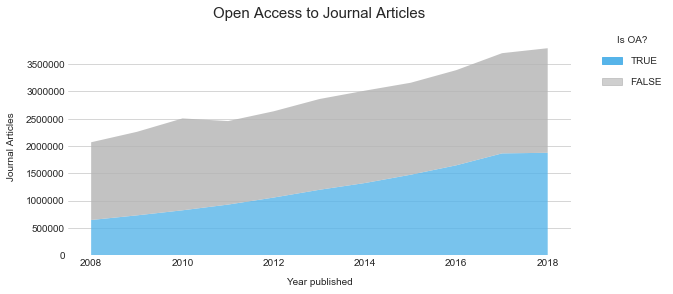

In [8]:
x = df.year.unique()
y1 = df[df.is_oa == True].n
y2 = df[df.is_oa == False].n

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [9, 4]
plt.grid(False, which='both', axis='x')
plt.box(False)
plt.stackplot(x, y1, y2, colors=['#56B4E9', '#b3b3b3a0'], alpha=0.8)
plt.title('Open Access to Journal Articles', fontdict={'fontsize': 15, 'fontweight': 500}, pad=20)
plt.xlabel('Year published', labelpad=10)
plt.ylabel('Journal Articles', labelpad=10)
is_oa_patch = mpatches.Patch(color='#56B4E9', label='TRUE')
is_not_oa_patch = mpatches.Patch(color='#b3b3b3a0', label='FALSE')
plt.legend(handles=[is_oa_patch, is_not_oa_patch], title='Is OA?', fontsize='medium', bbox_to_anchor=(1.2, 1.05), labelspacing=1.2)

plt.show()

## Unpaywall Open Access Hosting Types (host_type)

In [10]:
HOST_TYPE_08_12_QUERY = f'SELECT year, host_type, journal_is_in_doaj, COUNT(DISTINCT(doi)) AS number_of_articles FROM {upw_08_12}, UNNEST (oa_locations) WHERE genre="journal-article" AND is_best=true GROUP BY year, host_type, journal_is_in_doaj'
HOST_TYPE_13_18_QUERY = f'SELECT year, host_type, journal_is_in_doaj, COUNT(DISTINCT(doi)) AS number_of_articles FROM {upw_13_18}, UNNEST (oa_locations) WHERE genre="journal-article" AND year<2019 AND is_best=true GROUP BY year, host_type, journal_is_in_doaj'

In [11]:
host_type_08_12_query_df = client.query(HOST_TYPE_08_12_QUERY).to_dataframe()
host_type_13_18_query_df = client.query(HOST_TYPE_13_18_QUERY).to_dataframe()

host_type_df = pd.concat([host_type_08_12_query_df, host_type_13_18_query_df])
host_type_df.year = pd.to_datetime(host_type_df.year.apply(lambda x: str(x) + "-01-01"))
host_type_df = host_type_df.sort_values(by=['year']).reset_index(drop=True)

host_type_df.loc[host_type_df['host_type'] == 'publisher', 'host'] = 'Other Journals'
host_type_df.loc[host_type_df['host_type'] == 'repository', 'host'] = 'Repositories only'
host_type_df.loc[host_type_df['journal_is_in_doaj'] == True, 'host'] = 'DOAJ-listed Journal'

host_type_df

,year,host_type,journal_is_in_doaj,number_of_articles,host
0,2008-01-01,publisher,False,295155,Other Journals
1,2008-01-01,publisher,True,92337,DOAJ-listed Journal
2,2008-01-01,repository,False,258587,Repositories only
3,2009-01-01,publisher,False,332639,Other Journals
4,2009-01-01,publisher,True,114857,DOAJ-listed Journal
5,2009-01-01,repository,False,283108,Repositories only
6,2010-01-01,repository,False,299670,Repositories only
7,2010-01-01,publisher,False,368068,Other Journals
8,2010-01-01,publisher,True,155836,DOAJ-listed Journal
9,2011-01-01,publisher,False,423726,Other Journals


In [12]:
all_articles = host_type_df.groupby(['year'])['number_of_articles'].sum().reset_index(name='number_of_articles')

In [13]:
#TODO Graph

## Unpaywall Open Access Evidence Types (evidence)

In [20]:
EVIDENCE_08_12_QUERY = f'SELECT evidence, year, is_best, COUNT(distinct(doi)) AS number_of_articles FROM {upw_08_12}, UNNEST (oa_locations) WHERE genre="journal-article" GROUP BY evidence, year, is_best'
EVIDENCE_13_18_QUERY = f'SELECT evidence, year, is_best, COUNT(distinct(doi)) AS number_of_articles FROM {upw_13_18}, UNNEST (oa_locations) WHERE genre="journal-article" AND year < 2019 GROUP BY evidence, year, is_best'

In [21]:
evidence_08_12 = client.query(EVIDENCE_08_12_QUERY).to_dataframe()
evidence_13_18 = client.query(EVIDENCE_13_18_QUERY).to_dataframe()

In [97]:
evidence_df = pd.concat([evidence_08_12, evidence_13_18])
evidence_df.year = pd.to_datetime(evidence_df.year.apply(lambda x: str(x) + "-01-01"))

In [102]:
articles_per_type_df = evidence_df.groupby(['evidence']).number_of_articles.sum().to_frame().reset_index().sort_values(by=['number_of_articles'], ascending=False).reset_index(drop=True)
articles_per_type_df['prop'] = articles_per_type_df['number_of_articles'].transform(lambda x: x / articles_per_type_df['number_of_articles'].sum() * 100)
articles_per_type_df['cumul'] = articles_per_type_df.prop.cumsum()
articles_per_type_table = articles_per_type_df.copy()
articles_per_type_table.prop = articles_per_type_table.prop.apply(lambda x: '{0:.2f}'.format(x))
articles_per_type_table.cumul = articles_per_type_table.cumul.apply(lambda x: '{0:.2f}'.format(x))
articles_per_type_table.columns = ['Evidence Types', 'Number of Articles', 'Proportion of all Articles in %', 'Cumulative Proportion in %']

articles_per_type_table

,Evidence Types,Number of Articles,Proportion of all Articles in %,Cumulative Proportion in %
0,oa repository (semantic scholar lookup),5759641,20.12,20.12
1,oa repository (via OAI-PMH doi match),4467382,15.60,35.72
2,open (via free pdf),4427452,15.47,51.19
3,open (via page says license),3653314,12.76,63.95
4,oa journal (via doaj),3577409,12.50,76.45
5,oa repository (via pmcid lookup),3237547,11.31,87.75
6,oa repository (via OAI-PMH title and first aut...,1699654,5.94,93.69
7,oa journal (via observed oa rate),781574,2.73,96.42
8,open (via crossref license),594003,2.07,98.50
9,open (via page says Open Access),101344,0.35,98.85
